## 3. Polynomial Regression

### 공부 시간에 따른 시험 점수 (우등생)

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
dataset = pd.read_csv('./PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [97]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 전체 데이터로 학습 (모델 생성)

LinearRegression()

### 데이터 시각화 (전체)

Text(0, 0.5, 'score')

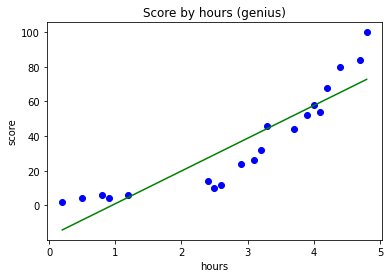

In [98]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, reg.predict(X), color="green") # 선 그래프
plt.title("Score by hours (genius)")  # 제목
plt.xlabel("hours") # X 축 이름
plt.ylabel("score") # y 축 이름

In [99]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2 다항 회귀 (Polynomial Regression)

In [100]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # 2차 다항식
# poly_reg = PolynomialFeatures(degree=4) # 2차 다항식

# fit: 새롭게 만들 feature들의 조합을 찾는 역할
# transform : 실제로 데이터를 변환하는 작업
# fit, transform 각각 호출할 수도 있다.
X_poly = poly_reg.fit_transform(X) # feature 변환

# 설정한 degree 값에 맞게, X의0승, X의1승, X의2승 을 각각 생성
X_poly[:5] # [x] -> [x^0, x^1, x^2] -> x가 3이라면 [3^0, 3^1, 3^2] -> [1, 3, 9] 으로 변환

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [101]:
X[:5] # 원본 데이터

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [102]:
# 현재 데이터에서 feature의 개수는 1개이지만, 더 많은 feature가 있다면 더 많은 조합이 나옴
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [103]:
# feature를 변환시킨 후, 회귀를 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X와 y를 가지고 모델 생성 (학습)

LinearRegression()

### 데이터 시각화 (변환된 X와 y)

Text(0, 0.5, 'score')

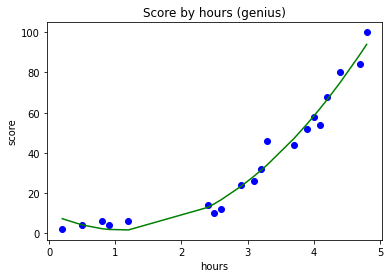

In [104]:
plt.scatter(X, y, color="blue")
plt.plot(X, lin_reg.predict(X_poly), color="green")
plt.title("Score by hours (genius)")  # 제목
plt.xlabel("hours") # X 축 이름
plt.ylabel("score") # y 축 이름

In [105]:
# 목적 : 위의 꺾여진 그래프를 변경하기 위하여, 데이터의 수를 더 늘려서 그래프의 꺾인 부분을 더 유연하게 하고자 함.

X_range = np.arange(min(X), max(X), 0.1) # X의 최솟값 ~ X의 최댓값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range


array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [106]:
X_range.shape # X_range를 사용하기 위해서는 원본 X의 데이터와 차원을 같게해주어야 한다. (2차원 배열로 동일하게 적용)


(46,)

In [107]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [108]:
X_range = X_range.reshape(-1, 1) # row(-1) : 데이터 전체에 대해서 우선 columns을 만들고, 거기에 맞게 row의 개수를 만들도록 자동적으로 조절
X_range.shape # 2차원

(46, 1)

In [109]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

Text(0, 0.5, 'score')

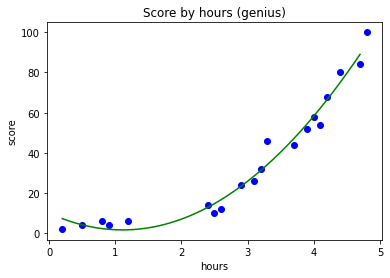

In [110]:
X_range_poly = poly_reg.fit_transform(X_range) # feature 변환

plt.scatter(X, y, color="blue")
plt.plot(X_range, lin_reg.predict(X_range_poly), color="green")
plt.title("Score by hours (genius)")  # 제목
plt.xlabel("hours") # X 축 이름
plt.ylabel("score") # y 축 이름

### 공부 시간에 따른 시험 성적 예측

In [111]:
reg.predict([[2]]) # 2시간을 공부했을 때 "선형 회귀" 모델의 예측

array([19.85348988])

In [112]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 "다항 회귀" 모델의 예측

array([7.05092142])

In [113]:
lin_reg.score(X_poly, y) # 단순 선형 회귀 모델보다 더 높게 측정됨.

0.9755457185555199